## Reflection Coefficients

In [1]:
import sys
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('seaborn-poster')
# from bqplot import pyplot as plt
lines = ["-","--","-.",":", "o", "v", "d", "^", "<", ">", "1", "2", "3", "4", "s", "p", "*"]

# path = sys.argv

# folder = str(path[1])
# filename = str(path[2])


In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [27]:
# os.listdir("../scripts/refl/")
# csvlist = glob.glob('../scripts/refl/*_REFL0.0*RANGE20*.csv')
csvlist = glob.glob('../scripts/refl/*RANGE10*.csv')[1::2]
csvlist1e4 = glob.glob('../scripts/refl/*RANGE10*.csv')[::2]
csvlist,\
csvlist1e4

(['../scripts/refl/halo_parallel_REFL0.010000_ITER3000000_STEPS10000_RANGE10.000000_TH_10_t2017-10-13-11-22-41.csv',
  '../scripts/refl/halo_parallel_REFL0.020000_ITER3000000_STEPS10000_RANGE10.000000_TH_10_t2017-10-13-11-23-40.csv',
  '../scripts/refl/halo_parallel_REFL0.030000_ITER3000000_STEPS10000_RANGE10.000000_TH_10_t2017-10-13-11-24-56.csv',
  '../scripts/refl/halo_parallel_REFL0.040000_ITER3000000_STEPS10000_RANGE10.000000_TH_10_t2017-10-13-11-26-19.csv',
  '../scripts/refl/halo_parallel_REFL0.050000_ITER3000000_STEPS10000_RANGE10.000000_TH_10_t2017-10-13-11-27-50.csv',
  '../scripts/refl/halo_parallel_REFL0.060000_ITER3000000_STEPS10000_RANGE10.000000_TH_10_t2017-10-13-11-29-30.csv',
  '../scripts/refl/halo_parallel_REFL0.070000_ITER3000000_STEPS10000_RANGE10.000000_TH_10_t2017-10-13-11-31-20.csv',
  '../scripts/refl/halo_parallel_REFL0.080000_ITER3000000_STEPS10000_RANGE10.000000_TH_10_t2017-10-13-11-33-22.csv',
  '../scripts/refl/halo_parallel_REFL0.090000_ITER3000000_STEPS1

In [4]:
def dataimp(path):
    
#     return np.genfromtxt("../scripts/refl/" + path, delimiter = ", ")
    return np.genfromtxt( path, delimiter = ", ")


In [5]:
# data1 = dataimp("halo_parallel_REFL0.100000_ITER1000000_STEPS10000_RANGE1.000000_TH_15_t2017-10-9-17-26-9.csv")
# data2 = dataimp("halo_parallel_REFL0.200000_ITER1000000_STEPS10000_RANGE1.000000_TH_15_t2017-10-9-17-38-21.csv")
# data3 = dataimp("halo_parallel_REFL0.300000_ITER1000000_STEPS10000_RANGE1.000000_TH_15_t2017-10-9-17-50-30.csv")
# data4 = dataimp("halo_parallel_REFL0.400000_ITER1000000_STEPS10000_RANGE1.000000_TH_15_t2017-10-9-18-2-39.csv")
# data5 = dataimp("halo_parallel_REFL0.500000_ITER1000000_STEPS10000_RANGE1.000000_TH_15_t2017-10-9-18-14-47.csv")
# data6 = dataimp("halo_parallel_REFL0.600000_ITER1000000_STEPS10000_RANGE1.000000_TH_15_t2017-10-9-18-26-55.csv")
# data7 = dataimp("halo_parallel_REFL0.700000_ITER1000000_STEPS10000_RANGE1.000000_TH_15_t2017-10-9-18-39-4.csv")
# data8 = dataimp("halo_parallel_REFL0.800000_ITER1000000_STEPS10000_RANGE1.000000_TH_15_t2017-10-9-18-51-15.csv")
# data9 = dataimp("halo_parallel_REFL0.900000_ITER1000000_STEPS10000_RANGE1.000000_TH_15_t2017-10-9-19-3-24.csv")
# data10 = dataimp("halo_parallel_REFL1.000000_ITER1000000_STEPS10000_RANGE1.000000_TH_15_t2017-10-9-19-15-32.csv")

datarr = []

for i in range(len(csvlist)):
    
    datarr.append( dataimp(csvlist[i]) )

print("Data Loaded")


Data Loaded


In [6]:
totlen = len(datarr[0])
length = int(len(datarr[0][0])/2)

x = datarr[0][0][:length+1]


In [21]:
def plotdata(dataraw, style, id):
    
    datafull = dataraw
    datafull = np.delete(datafull,0, axis=0)
    data = datafull[::3]
    data = np.insert(data, 0 ,dataraw[0], axis=0)
    
    plt.plot(x, data[-1][:length+1]/2+0.5, lines[style]+"r", linewidth=2, markersize = 6, label='R='+id+' Forward')
    plt.plot(x, data[-1][length:2*length+1][::-1]/2+0.5, lines[style]+'k', linewidth=2, markersize = 6, label='R='+id+' Backward')

def logplotdata(dataraw, style, id):

    datafull = dataraw
    datafull = np.delete(datafull,0, axis=0)
    data = datafull[::3]
    data = np.insert(data, 0 ,dataraw[0], axis=0)
    
    plt.semilogy(x, data[-1][:length+1]/2+0.5, lines[style]+"r", linewidth=2, markersize = 6, label='R='+id+' Forward')
    plt.semilogy(x, data[-1][length:2*length+1][::-1]/2+0.5, lines[style]+'k', linewidth=2, markersize = 6, label='R='+id+' Forward')


In [22]:
s2thetav = 0.916515138991;
omegav = 1;

def ProbTh(x):
    
    return 1 - ( s2thetav**2 )* np.sin( omegav * x / 2 )**2

lengthth = 100;
xth = np.arange(0,20,10/lengthth)
# print(x)
ptheory = ProbTh(xth)

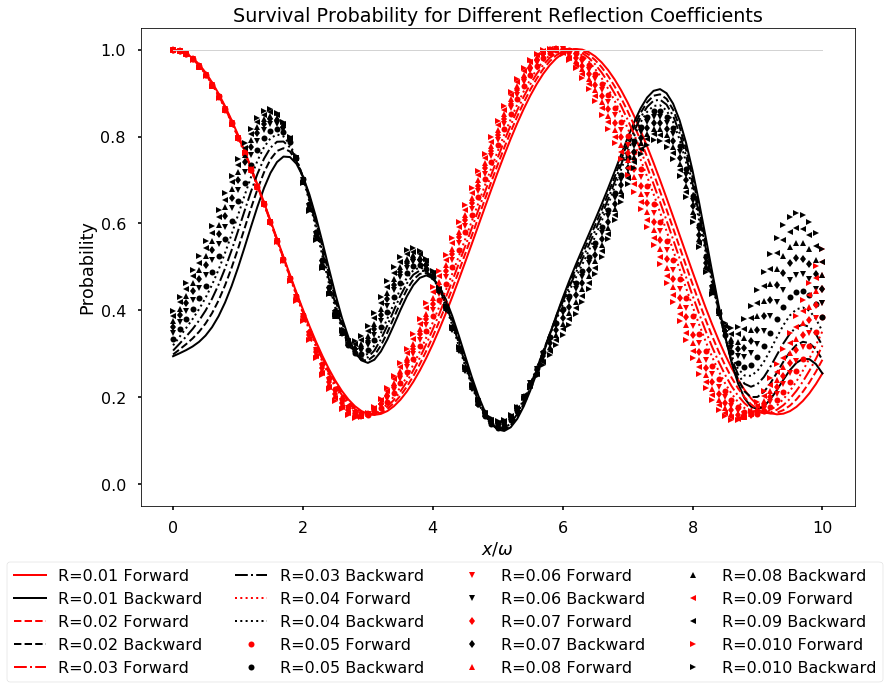

In [23]:
# plotdata(data1, 0, '0.1')
# plotdata(data2, 1, '0.2')
# plotdata(data3, 2, '0.3')
# plotdata(data4, 3, '0.4')
# plotdata(data5, 4, '0.5')
# plotdata(data6, 5, '0.6')
# plotdata(data7, 6, '0.7')
# plotdata(data8, 7, '0.8')
# plotdata(data9, 8, '0.9')
# plotdata(data10, 9, '1.0')

for i in range(len(csvlist)):
    
    plotdata(datarr[i],i,'0.0'+str(i+1))

plt.plot( x, np.array([1 for i in x]) , 'lightgray', linewidth=1)
# one of them goes beyond 1 a little bit

plt.title('Survival Probability for Different Reflection Coefficients')
plt.ylim(-0.05,1.05)
plt.xlabel('$x/\omega$')
plt.ylabel('Probability')
plt.legend(loc=0, ncol=4,bbox_to_anchor=(1.05, -0.1))
# plt.legend()

plt.show()

In [24]:
def interplot(i):
    
    plt.plot( xth[:lengthth+1],ptheory[:lengthth+1] , "gray", linewidth=1.5, label='Vacuum' )
    plt.plot( xth[1:lengthth+1], ptheory[lengthth:][::-1] , "gray" , linewidth=1.5, label='Vacuum')

    plotdata(datarr[i],i,'0.0'+str(i+1))
    plt.plot( x, np.array([1 for i in x]) , 'lightgray', linewidth=1)
    plt.title('Survival Probability for Different Reflection Coefficients')
    plt.ylim(-0.05,1.05)
    plt.legend(loc=0, ncol=4,bbox_to_anchor=(0.98, -0.1))
    plt.show()


In [25]:
interactive_plot = interactive(interplot, i=(0,9))
output = interactive_plot.children[-1]
output.layout.height = '600px'
interactive_plot

A Jupyter Widget

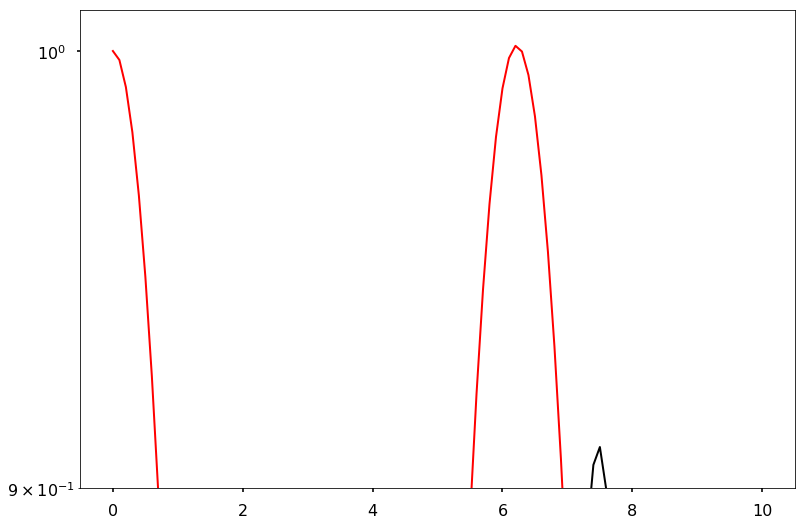

In [12]:
logplotdata(datarr[0],0,'0.'+str(0+1))
plt.ylim(0.9,1.01)
plt.show()

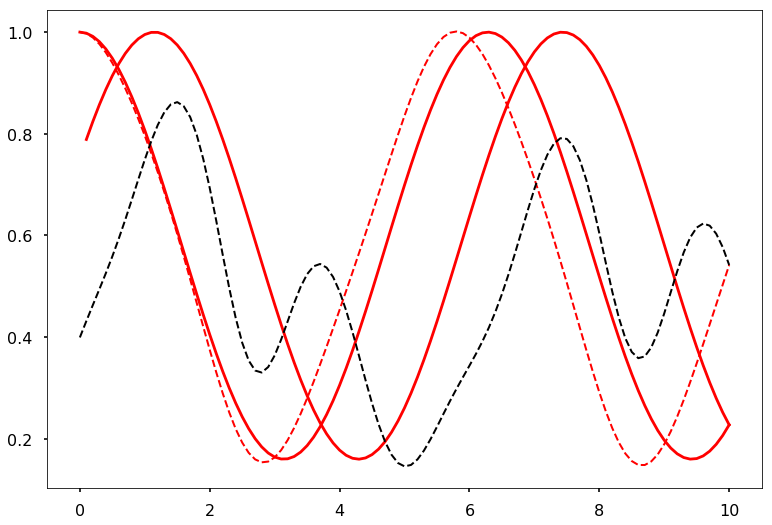

In [15]:
plt.plot( xth[:lengthth+1],ptheory[:lengthth+1] , lines[0]+"r", label='Vacuum Forward' )
plt.plot( xth[1:lengthth+1][::-1], ptheory[lengthth:] , lines[0]+"r", label='Vacuum Back')
plotdata(datarr[9], 1, '0.1')
plt.show()
